# Bitcoin Price Prediction Model Project

In [1]:
#Import library files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

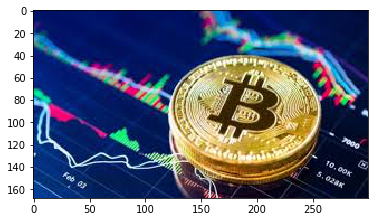

In [2]:
#display image
import matplotlib.image as mpimg
image = mpimg.imread(r"C:\Users\Rahul\Downloads\ibm ml\bitcoinlogo.jpg")
plt.imshow(image)

### Load data files

In [3]:
#load data files
df1=pd.read_csv(r"C:\Users\Rahul\Downloads\ibm ml\bitcoin1.csv")
df2=pd.read_csv(r"C:\Users\Rahul\Downloads\ibm ml\bitcoin2.csv")

In [4]:
df1.head(3)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,1417412040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1417412100,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df2.head(3)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Remove NaN values

In [6]:
df1.dropna(inplace=True)
df2.dropna(inplace=True)
#check is there any null value after removal
print(df1.isnull().sum())
print(df2.isnull().sum())

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64
Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64


In [7]:
#shape of both dataset
print(df1.shape)
print(df2.shape)

(1990691, 8)
(2765819, 8)


In [8]:
df2.tail(4)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
3997693,1565567820,11553.49,11556.22,11553.49,11556.22,0.623462,7204.428272,11555.520505
3997694,1565567880,11559.73,11561.22,11546.77,11561.22,0.159070,1838.731403,11559.252199
3997695,1565567940,11559.73,11589.73,11528.73,11528.73,16.198210,187504.635170,11575.638889
3997696,1565568000,11527.44,11551.57,11520.00,11520.00,23.805939,274731.256920,11540.450291


In [9]:
df1.tail(4)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
2099756,1546898580,4006.01,4006.57,4006.00,4006.01,0.902164,3614.083169,4006.017233
2099757,1546898640,4006.01,4006.01,4006.00,4006.01,1.192123,4775.647308,4006.003635
2099758,1546898700,4006.01,4006.01,4005.50,4005.50,2.699700,10814.241898,4005.719991
2099759,1546898760,4005.51,4006.01,4005.51,4005.99,1.752778,7021.183546,4005.745614


### Concatenate the two datasets and make one single dataframe

In [10]:
#concatenate the two df
frames=[df1,df2]
df=pd.concat(frames)

In [11]:
#sort data as per Timestamp
df.sort_values("Timestamp",inplace=True)

In [12]:
#len of entire dataframe after concatenation
len(df)
df.dropna(inplace=True)

In [13]:
#drop duplicates rows as per the timestamp column
df.drop_duplicates(subset="Timestamp",keep="first",inplace=True)

In [14]:
#len after removing duplicates
len(df)

3116022

In [15]:
df.head(3)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411


In [16]:
df.tail(3)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
3997694,1565567880,11559.73,11561.22,11546.77,11561.22,0.159070,1838.731403,11559.252199
3997695,1565567940,11559.73,11589.73,11528.73,11528.73,16.198210,187504.635170,11575.638889
3997696,1565568000,11527.44,11551.57,11520.00,11520.00,23.805939,274731.256920,11540.450291


In [17]:
#so now we have the sorted data with us
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3116022 entries, 0 to 3997696
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 214.0 MB


## Data Visualisation

In [18]:
df1=df.drop(columns=['Volume_(BTC)','Volume_(Currency)'])
df1=df1.sample(70)

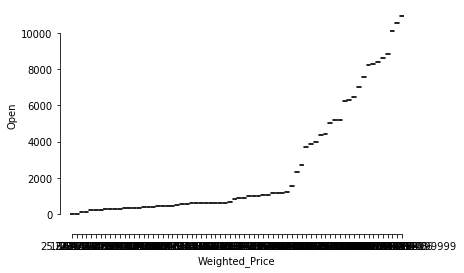

In [19]:
sns.boxplot(x="Weighted_Price", y="Open",
             palette=["m", "g"],
            data=df1)
sns.despine(offset=10, trim=True)

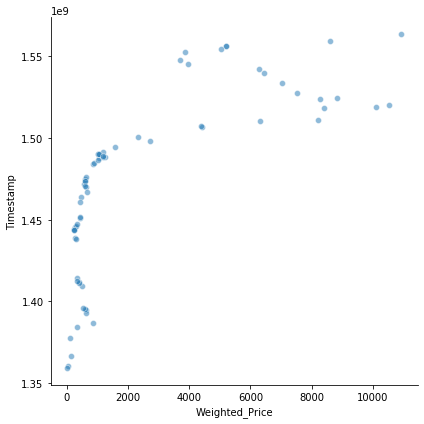

In [20]:
sns.relplot(x="Weighted_Price", y="Timestamp", 
            sizes=(40, 400), alpha=.5, 
            height=6, data=df1)

## Let's also check the correlation between them

In [21]:
df1.corr()

,Timestamp,Open,High,Low,Close,Weighted_Price
Timestamp,1.000000,0.723167,0.723168,0.723130,0.723071,0.723174
Open,0.723167,1.000000,0.999999,1.000000,0.999999,0.999999
High,0.723168,0.999999,1.000000,0.999999,0.999999,1.000000
Low,0.723130,1.000000,0.999999,1.000000,0.999999,1.000000
Close,0.723071,0.999999,0.999999,0.999999,1.000000,1.000000
Weighted_Price,0.723174,0.999999,1.000000,1.000000,1.000000,1.000000


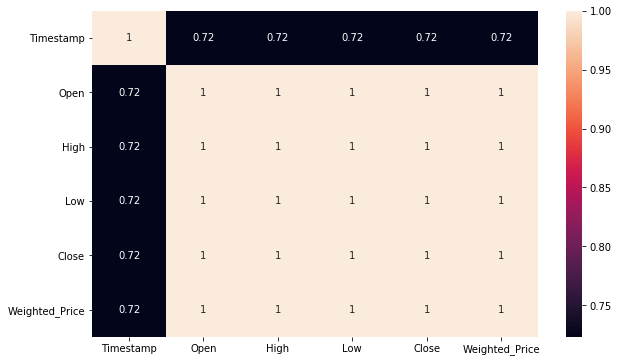

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(df1.corr(),annot=True)

## Drop the unwanted columns

In [24]:
df=df.drop(columns=['Volume_(BTC)','Volume_(Currency)'])

In [25]:
df.head(3)

,Timestamp,Open,High,Low,Close,Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,4.390000
478,1325346600,4.39,4.39,4.39,4.39,4.390000
547,1325350740,4.50,4.57,4.50,4.57,4.526411


## Import model and train the model

In [26]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
from sklearn.model_selection import train_test_split

In [27]:
X=df[['Timestamp','Open','High','Low','Close']]
Y=df[['Weighted_Price']]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20 ,random_state=200)

In [28]:
pd.plotting.deregister_matplotlib_converters()
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Accuracy

In [29]:
reg.score(X_test,Y_test)

0.9999996559566853